## Kiva: Machine Learning - Regression Analysis:  
<b><br>
This script contains the following: <br>
1. Importing libraries and data <br>
2. Data cleaning<br>
3. Data prep for regression analysis <br>
4. Regression analysis <br>
5. Results
</b>

## 1. Importing libraries and data

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib 
import matplotlib.pyplot as plt 
import os 
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Ensure the graphs created are displayed automatically 

%matplotlib inline 

In [4]:
path = r'/Users/admin/Desktop/Kiva Data Analysis'

In [5]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'kiva_loans.csv'))

## 2. Data cleaning 

In [6]:
df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [7]:
df.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [8]:
df.shape

(671205, 20)

In [9]:
df.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


<b><i> Missing values</b></i>

In [10]:
# Check for missing values 

df.isnull().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

Notes: There are multiple missing values in select columns. None of them are essential to be imposed or removed at this point. In other words, leave missing values as is for now.

<b><i> Duplicates Check</b></i> 

In [11]:
dups = df.duplicated()

In [12]:
dups.shape # No dups

(671205,)

<b><i> Extreme values checks</b></i>

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lender_count', ylabel='Density'>

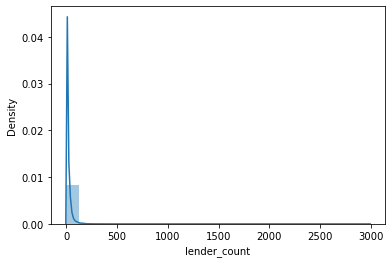

In [13]:
sns.distplot(df['lender_count'], bins = 25) # Shows extreme values 

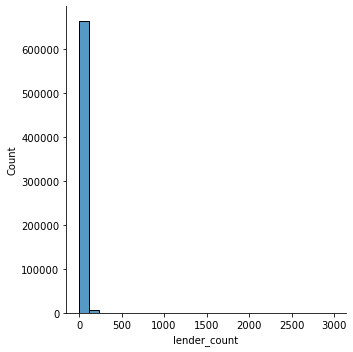

In [14]:
sns.displot(df['lender_count'], bins = 25) # Shows extreme values 

In [15]:
# Check the mean 
df['lender_count'].mean()

20.590922296466804

In [16]:
# Check the median 
df['lender_count'].median()

13.0

In [17]:
# Check the max 
df['lender_count'].max()

2986

In [18]:
# Check the min 
df['lender_count'].min()

0

In [19]:
df.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


Notes: <br>
There is a wide range in the number of lenders and amount in loans in "funded_amount", "loan_amount", and "lender_count" columns. For instance, in the "lender_count" column, the range of lenders starts at 0 and ends at 2,986. In the "funded_amount" and "loan_amount" columns, the range starts at 0 (or 25 USD) and ends at 100,000 USD. 

It is safe to assume there are extreme values/outliers here but extreme values will not be removed at this time. 

Also, the data seems to suggest two things: 1) the amount given in a loan increase with the number of lenders involved in a loan, and 2) the larger the amount in loan is given, the longer the term in months the lender(s) have to pay it back.

## 3. Data prep for regression analysis

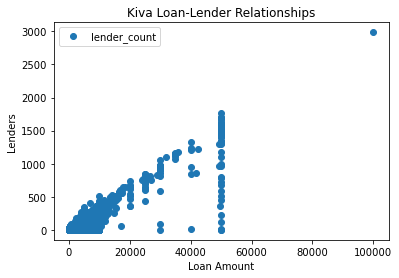

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other. 

df.plot(x = 'loan_amount', y = 'lender_count', style = 'o') # the style option creates a scatterplot; without it, we only have lines
plt.title('Kiva Loan-Lender Relationships')
plt.xlabel('Loan Amount')
plt.ylabel('Lenders')
plt.show()

#### There is an extreme outlier here; there's a loan amount of 100,000 USD given to  a group of 3,000 lenders. The rest of the data points are boxed in loan amounts under 55,000 USD and no more than 2,000 lenders. 

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects

X = df['loan_amount'].values.reshape(-1,1)
y = df['lender_count'].values.reshape(-1,1)

In [22]:
X

array([[300.],
       [575.],
       [150.],
       ...,
       [ 25.],
       [ 25.],
       [ 25.]])

In [23]:
y

array([[12],
       [14],
       [ 6],
       ...,
       [ 0],
       [ 0],
       [ 0]])

In [24]:
# Split data into a training set and a test set. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 4. Regression analysis

In [25]:
# Create a regression object 

regression = LinearRegression() # This is the regression object, which will be fit onto the training set

In [26]:
# Fit the regression object onto the training set 

regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict the values of y using X 

y_predicted = regression.predict(X_test)

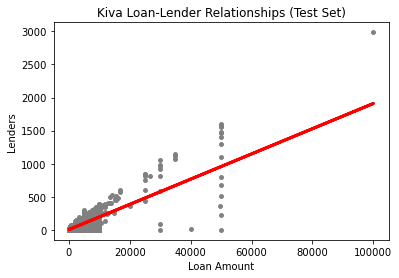

In [28]:
# Create a plot that shows the regression line from the model on the test set 

plot_test = plt 
plot_test.scatter(X_test, y_test, color='gray', s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)
plot_test.title('Kiva Loan-Lender Relationships (Test Set)')
plot_test.xlabel('Loan Amount')
plot_test.ylabel('Lenders')
plot_test.show()

In [29]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error 
r2 = r2_score(y_test, y_predicted) # This is the R2 score 

In [30]:
# Print the model summary statistics
# This is where the performance of the model is evaluated 

print('Slope:', regression.coef_)
print('Mean squared error:', rmse)
print('R2 score:', r2)

Slope: [[0.01904916]]
Mean squared error: 302.2593558708953
R2 score: 0.6375195531709608


In [31]:
y_predicted

array([[ 8.85095276],
       [19.80421934],
       [10.27963971],
       ...,
       [10.75586869],
       [11.70832665],
       [ 8.85095276]])

In [32]:
# Create a dataframe comparing the actual and predicted values of y 

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})

In [33]:
data.head(25)

,Actual,Predicted
0,9,8.850953
1,24,19.804219
2,7,10.279640
3,18,14.089472
4,26,23.137822
5,27,20.280448
6,13,11.708327
7,9,12.660785
8,1,10.755869
9,3,6.946037


<b><i>Compare how the regression fits the training set</b></i> 

In [34]:
# Predict 

y_predicted_train = regression.predict(X_train) # This is predicting X-train

In [35]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [36]:
# Print results 
print('Slope:', regression.coef_)
print('Mean squared error:', rmse)
print('R2 score:', r2)

Slope: [[0.01904916]]
Mean squared error: 289.4285738628776
R2 score: 0.6380756489718884


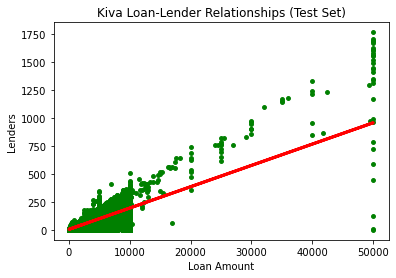

In [37]:
# Visualizing the training set results 

plot_test = plt 
plot_test.scatter(X_train, y_train, color='green', s=15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth=3)
plot_test.title('Kiva Loan-Lender Relationships (Test Set)')
plot_test.xlabel('Loan Amount')
plot_test.ylabel('Lenders')
plot_test.show()

#### <i> Bonus: performance improvement after removing outliers </i>

In [38]:
# Clean the extreme values from the "lender_count" variable observed during the consistency checks

df_test = df[df['lender_count'] <= 2000] # less than or equal to 2,000 lenders. 

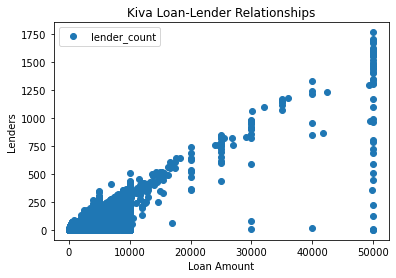

In [39]:
# See how the scatterplot looks without outliers 

df_test.plot(x = 'loan_amount', y = 'lender_count', style = 'o')
plt.title('Kiva Loan-Lender Relationships')
plt.xlabel('Loan Amount')
plt.ylabel('Lenders')
plt.show()

In [40]:
# Reshape again

X_2 = df_test['loan_amount'].values.reshape(-1,1)
y_2 = df_test['lender_count'].values.reshape(-1,1)

In [41]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [42]:
# Run and fit the regression 

regression = LinearRegression()
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [43]:
# Predict

y_predicted_2 = regression.predict(X_test_2)

In [44]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [45]:
# Print results 

print('Slope:', regression.coef_)
print('Mean squared error:', rmse)
print('R2 Score:', r2)

Slope: [[0.01898715]]
Mean squared error: 292.4372021162033
R2 Score: 0.6266707895680415


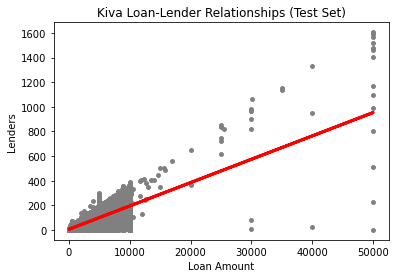

In [46]:
# Visualize test set results 

plot_test = plt 
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_train_2, regression.predict(X_train_2), color='red', linewidth =3)
plot_test.title('Kiva Loan-Lender Relationships (Test Set)')
plot_test.xlabel('Loan Amount')
plot_test.ylabel('Lenders')
plot_test.show()

## 5. Results

The R2 Score for both models are weak (at 0.6). Removing the outlier did not scientifically improve results. There are multiple data points outside the linear line in both models which suggest that a liner regression is not a viable method to predict Loan-Lender relationships and that there are other factors at play here. 

In [49]:
# Export df 
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'kiva_loans_cleaned.csv'))